In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#%matplotlib inline

In [ ]:
from sklearn.utils import shuffle  
columns = ["id", "activity", "time", "x", "y", "z"]
df =  pd.read_table("./data_1600_accel_phone.txt",header=None,sep=',',names=columns)
df = shuffle(df)  
#df = df.query('activity=="A" or activity=="B" or activity=="C" or activity=="D" or activity=="E" or activity=="F"')
df.head()

,id,activity,time,x,y,z
55196,1600,Q,245090875172267,1.816498,9.362244,1.7045898;
52594,1600,P,253137863138414,-2.126907,9.449219,-2.4839478;
51370,1600,P,253076229848643,-6.449478,7.267929,-3.5643463;
48486,1600,O,252865699748795,-1.361008,9.740051,0.29631042;
50902,1600,P,253052664169927,-1.500076,10.152344,3.2945404;


In [ ]:
print(df.isnull().sum())
print("\n== > There is no null value in the dataset.")

id          0
activity    0
time        0
x           0
y           0
z           0
dtype: int64

== > There is no null value in the dataset.


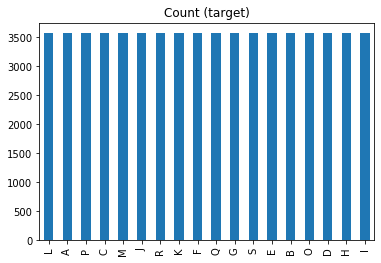

In [ ]:
target_count = df['activity'].value_counts()
target_count.plot(kind='bar', title='Count (target)')

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


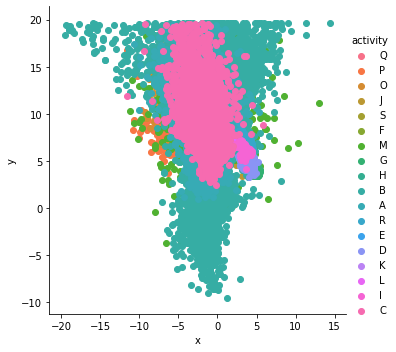

In [ ]:
# data show in graph 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

g = sns.FacetGrid(df, hue="activity", size=5) \
   .map(plt.scatter, "x", "y") \
   .add_legend()
#plt.savefig("activity distribution.png"
g.savefig("activity distribution.png") 

In [ ]:
pre = np.array(df.iloc[: ,3:5])
def get_name(name):
    return name.split(';')[0]

def remove_str(name):
    return name.split(' ')[0]
    
    
last = np.array(df.iloc[: ,5].apply(get_name))
data = np.column_stack((pre,last))
print(data.shape)
target = np.array(df.iloc[:,1].apply(remove_str))
print(target.shape)

(64311, 3)
(64311,)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

X = np.array(data.astype(float))
Y = np.array(target)
le = LabelEncoder()
Y = le.fit_transform(Y)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [ ]:
y_train

array([16,  0, 16, ...,  1, 13,  3])

In [ ]:
X.shape , Y.shape

((64311, 3), (64311,))

In [ ]:
X_train.shape, X_test.shape

((51448, 3), (12863, 3))

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

# Instantiate learning model (k = 3)
classifier = GaussianNB()

# Fitting the model
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')

Accuracy of our model is equal 74.29 %.


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

# Instantiate learning model (k = 3)
classifier = KNeighborsClassifier(n_neighbors=3)

# Fitting the model
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')

Accuracy of our model is equal 79.9 %.


In [ ]:
# creating list of K for KNN
k_list = list(range(1,50,2))
# creating list of cv scores
cv_scores = []

# perform 10-fold cross validation
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

print("The max cross valitation score is ", np.max(cv_scores))

The max cross valitation score is  0.822481757456379


In [ ]:
# changing to misclassification error
MSE = [1 - x for x in cv_scores]

plt.figure()
plt.figure(figsize=(8,5))
plt.title('The optimal number of neighbors', fontsize=12, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=10)
plt.ylabel('Misclassification Error', fontsize=10)
sns.set_style("whitegrid")
plt.plot(k_list, MSE)

plt.show()
plt.savefig("The optimal number of neighbors.png")

In [ ]:
# finding best k
best_k = k_list[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d." % best_k)

The optimal number of neighbors is 27.


In [ ]:
# when k = 33, test model 
classifier = KNeighborsClassifier(n_neighbors=41)

# Fitting the model
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of our model is when k = 49 : ' + str(round(accuracy, 2)) + ' %.')

Accuracy of our model is when k = 49 : 82.34 %.


In [ ]:
# Using random forest 
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a RandomForestClassifier Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy RandomForestClassifier :",metrics.accuracy_score(y_test, y_pred))

Accuracy RandomForestClassifier : 0.8175386768250019


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
#Create a GradientBoostingClassifier Classifier
clf=GradientBoostingClassifier()

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy of GradientBoostingClassifier :",metrics.accuracy_score(y_test, y_pred))

Accuracy of GradientBoostingClassifier : 0.819015781699448


In [ ]:
def p_value(p): 
    alpha = 0.05
    if p <= alpha :
        print("we reject the null hypothesis that there's no difference between "+ str(clf1 )+" and "+str(clf2) +" classifier ")
    elif p > alpha :
        print("we cannot conclude that a significant difference between "+str (clf1)+ " and "+ str(clf2)+ " exists ")



In [ ]:
from mlxtend.evaluate import paired_ttest_5x2cv
clf1 = KNeighborsClassifier(n_neighbors = 41)
clf2 = GradientBoostingClassifier()

t, p = paired_ttest_5x2cv(estimator1=clf1,
                          estimator2=clf2,
                          X=X_train, y=y_train,
                          random_seed=1)

print('t statistic: %.3f' % t)
print('p value: %.3f' % p)
p_value(p)

In [ ]:
from mlxtend.evaluate import paired_ttest_5x2cv
clf1 = KNeighborsClassifier()
clf2 = RandomForestClassifier()

t, p = paired_ttest_5x2cv(estimator1=clf1,
                          estimator2=clf2,
                          X=X_train, y=y_train,
                          random_seed=1)

print('t statistic: %.3f' % t)
print('p value: %.3f' % p)
p_value(p)

In [ ]:
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
Y = encoder.fit_transform(Y)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [ ]:
# deep learning 

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import optimizers
from keras.regularizers import l2, l1

Using TensorFlow backend.


In [ ]:
model = Sequential()
model.add(Dense(8, input_dim=3, activation='relu')) # kernel_regularizer=l1(0.001)
model.add(Dropout(0.1))
model.add(Dense(32, activation='relu'))
model.add(Dense(64, activation = 'relu'))
#model.add(Dense(64, activation = 'relu'))
#model.add(Dropout(0.5))
#model.add(Dense(16, activation='relu'))
#model.add(Dense(15 , activation = 'relu'))
#model.add(Dropout(0.2))
#model.add(Dense(7, activation='relu'))
model.add(Dense(18, activation='softmax'))
optim = optimizers.SGD(lr=0.004, momentum=0.9, decay=0.0, nesterov=False)

In [ ]:
# compile the keras model
model.compile(loss='categorical_crossentropy', optimizer= optim, metrics=['accuracy'])

In [ ]:
# fit the keras model on the dataset
n_epochs = 20
model.fit(X_train, y_train, epochs = n_epochs , batch_size=32)

Epoch 1/20
51448/51448 [==============================] - 5s 95us/step - loss: 0.6243 - acc: 0.7763
Epoch 2/20
51448/51448 [==============================] - 5s 96us/step - loss: 0.6230 - acc: 0.7766
Epoch 3/20
51448/51448 [==============================] - 5s 96us/step - loss: 0.6206 - acc: 0.7779
Epoch 4/20
51448/51448 [==============================] - 5s 96us/step - loss: 0.6223 - acc: 0.7775
Epoch 5/20
51448/51448 [==============================] - 5s 92us/step - loss: 0.6227 - acc: 0.7778
Epoch 6/20
51448/51448 [==============================] - 5s 95us/step - loss: 0.6231 - acc: 0.7767
Epoch 7/20
51448/51448 [==============================] - 5s 95us/step - loss: 0.6192 - acc: 0.7782
Epoch 8/20
51448/51448 [==============================] - 5s 96us/step - loss: 0.6170 - acc: 0.7779
Epoch 9/20
51448/51448 [==============================] - 5s 99us/step - loss: 0.6159 - acc: 0.7789
Epoch 10/20
51448/51448 [==============================] - 5s 100us/step - loss: 0.6201 - acc: 0.778

In [ ]:
# evaluate the keras model
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

12863/12863 [==============================] - 1s 40us/step
Accuracy: 79.59


In [ ]:
X_train.shape , y_test.shape

((51448, 3), (12863, 18))

In [ ]:
X_tr = X_train.reshape(51448, 3 , 1)
X_ts = X_test.reshape(12863 , 3 , 1)

In [ ]:
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import Flatten, Dropout
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(3,1)))
#model.add(Conv1D(filters=64, kernel_size=2, activation='relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=1))
#model.add(Conv1D(filters=64, kernel_size=1, activation='relu'))
model.add(Flatten())
model.add(Dense(120, activation='relu'))
model.add(Dense(18, activation='softmax'))


In [ ]:
model.compile(loss='categorical_crossentropy', optimizer= 'adam', metrics=['accuracy'])

In [ ]:
	model.fit(X_tr, y_train, epochs=n_epochs, batch_size=32, verbose=0)


In [ ]:
# evaluate the keras model
_, accuracy = model.evaluate(X_ts, y_test)
print('Accuracy: %.2f' % (accuracy*100))

12863/12863 [==============================] - 1s 68us/step
Accuracy: 80.09
